In [2]:
import os
import numpy as np
from numpy import reshape
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from pathlib import Path
home = str(Path.home())
base_path = os.path.join(home, 'workspace/multiLID/data/extract/run_1/')

In [3]:
attacks = ['fgsm', 'bim', 'pgd', 'aa', 'df', 'cw']
labels  = ['FGSM', 'BIM', 'PGD', 'AA', 'DF', 'CW']
cdict  = {0: 'black', 1: 'pink', 2: 'blue', 3: 'red', 4: 'green', 5: 'cyan', 6: 'orange', 7: 'purple'}

In [16]:
characteristics_clean = {}
characteristics_adv = {}
for att in attacks:
    eps = ""
    if att in ['fgsm', 'bim', 'pgd', 'aa']:
        eps = "_8255"
    
    clean     = torch.load(os.path.join(base_path, 'cifar10/wrn28-10/lid/{}/k20/lid_normalos{}.pt'.format(att, eps)) ).numpy()[:NR_SAMPLES]
    chars_adv = torch.load(os.path.join(base_path, 'cifar10/wrn28-10/lid/{}/k20/lid_adverlos{}.pt'.format(att, eps)) ).numpy()[:NR_SAMPLES]
    
    characteristics_clean[att] = clean
    characteristics_adv[att]   = chars_adv

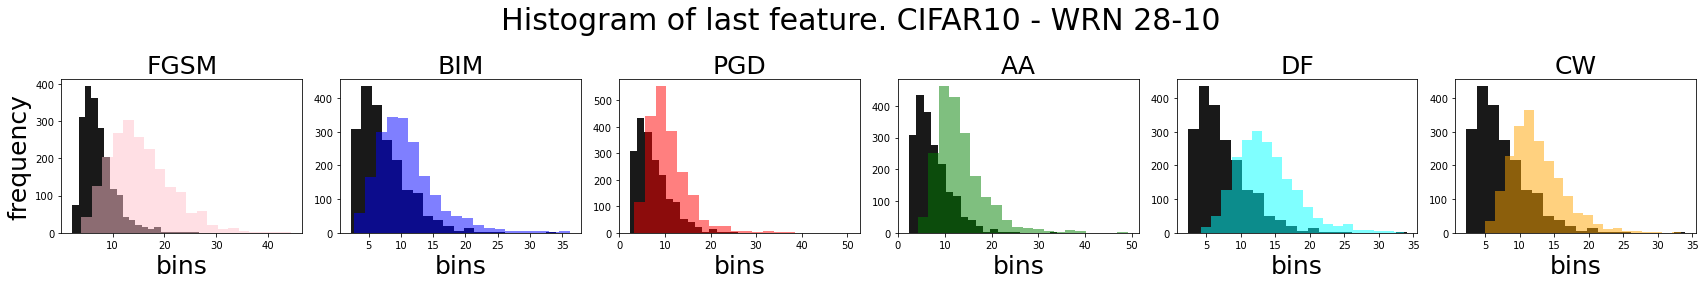

In [26]:
Layer_nr = 11

fig, axs = plt.subplots(  1 , len(attacks), figsize=(24, 4) )
BINS = 20

fig.suptitle( "Histogram of last feature. CIFAR10 - WRN 28-10", fontsize=30 )
# fig.supylabel('Frequency per Feature')

for i, att in enumerate(attacks):
    df = pd.DataFrame.from_dict(characteristics_clean[att])
    df_adv = pd.DataFrame.from_dict(characteristics_adv[att])
    df[int(Layer_nr)].plot.hist(ax=axs[i], bins=BINS, color='black',    alpha = 0.9)
    df_adv[int(Layer_nr)].plot.hist( ax=axs[i], bins=BINS, color=cdict[i+1], alpha = 0.5)
    if i  == 0:
        axs[i].set_ylabel( "frequency", fontsize=25 )
    if i  > 0:
        axs[i].set_ylabel("")

    axs[i].set_title(labels[i], fontsize=25)
    axs[i].set_xlabel("bins", fontsize=25)
        
fig.tight_layout(rect=[0, 0, 0.99, 0.99])

In [27]:
fig.savefig( 'plots/' + 'bins/' + 'cifar10_hist_cif10_lid.svg')

In [28]:
fig.savefig( 'plots/' + 'bins/' + 'cifar10_hist_vert_1row_k20_new.png')